# 线性代数

Numpy 定义了 `matrix` 类型，使用该 `matrix` 类型创建的是矩阵对象，它们的加减乘除运算缺省采用矩阵方式计算，因此用法和Matlab十分类似。但是由于 NumPy 中同时存在 `ndarray` 和 `matrix` 对象，因此用户很容易将两者弄混。这有违 Python 的“显式优于隐式”的原则，因此官方并不推荐在程序中使用 `matrix`。在这里，我们仍然用 `ndarray` 来介绍。

## 矩阵和向量积

矩阵的定义、矩阵的加法、矩阵的数乘、矩阵的转置与二维数组完全一致，不再进行说明，但矩阵的乘法有不同的表示。

- `numpy.dot(a, b[, out])`计算两个矩阵的乘积，如果是一维数组则是它们的内积。

【例1】
```python
import numpy as np

x = np.array([1, 2, 3, 4, 5])
y = np.array([2, 3, 4, 5, 6])
z = np.dot(x, y)
print(z)  # 70

x = np.array([[1, 2, 3], [3, 4, 5], [6, 7, 8]])
print(x)
# [[1 2 3]
#  [3 4 5]
#  [6 7 8]]

y = np.array([[5, 4, 2], [1, 7, 9], [0, 4, 5]])
print(y)
# [[5 4 2]
#  [1 7 9]
#  [0 4 5]]

z = np.dot(x, y)
print(z)
# [[  7  30  35]
#  [ 19  60  67]
#  [ 37 105 115]]

z = np.dot(y, x)
print(z)
# [[ 29  40  51]
#  [ 76  93 110]
#  [ 42  51  60]]
```

注意：在线性代数里面讲的维数和数组的维数不同，如线代中提到的n维行向量在 Numpy 中是一维数组，而线性代数中的n维列向量在 Numpy 中是一个shape为(n, 1)的二维数组。

---
## 矩阵特征值与特征向量

- `numpy.linalg.eig(a)` 计算方阵的特征值和特征向量。
- `numpy.linalg.eigvals(a)` 计算方阵的特征值。

【例1】求方阵的特征值特征向量
```python
import numpy as np

# 创建一个对角矩阵！
x = np.diag((1, 2, 3))  
print(x)
# [[1 0 0]
#  [0 2 0]
#  [0 0 3]]

print(np.linalg.eigvals(x))
# [1. 2. 3.]

a, b = np.linalg.eig(x)  
# 特征值保存在a中，特征向量保存在b中
print(a)
# [1. 2. 3.]
print(b)
# [[1. 0. 0.]
#  [0. 1. 0.]
#  [0. 0. 1.]]

# 检验特征值与特征向量是否正确
for i in range(3): 
    if np.allclose(a[i] * b[:, i], np.dot(x, b[:, i])):
        print('Right')
    else:
        print('Error')
# Right
# Right
# Right
```

【例2】判断对称阵是否为正定阵（特征值是否全部为正）。
```python
import numpy as np

A = np.arange(16).reshape(4, 4)
print(A)
# [[ 0  1  2  3]
#  [ 4  5  6  7]
#  [ 8  9 10 11]
#  [12 13 14 15]]

A = A + A.T  # 将方阵转换成对称阵
print(A)
# [[ 0  5 10 15]
#  [ 5 10 15 20]
#  [10 15 20 25]
#  [15 20 25 30]]

B = np.linalg.eigvals(A)  # 求A的特征值
print(B)
# [ 6.74165739e+01 -7.41657387e+00  1.82694656e-15 -1.72637110e-15]

# 判断是不是所有的特征值都大于0，用到了all函数，显然对称阵A不是正定的
if np.all(B > 0):
    print('Yes')
else:
    print('No')
# No
```


---
## 矩阵分解

### **奇异值分解**

有关奇异值分解的原理：[奇异值分解（SVD）及其应用](https://mp.weixin.qq.com/s/GNHPamltnqaUpGG9NhvWxg)

- `u, s, v = numpy.linalg.svd(a, full_matrices=True, compute_uv=True, hermitian=False)`奇异值分解
    - `a` 是一个形如(M,N)矩阵
    - `full_matrices`的取值是为False或者True，默认值为True，这时`u`的大小为(M,M)，`v`的大小为(N,N)。否则`u`的大小为(M,K)，`v`的大小为(K,N) ，K=min(M,N)。
    - `compute_uv`的取值是为False或者True，默认值为True，表示计算`u,s,v`。为False的时候只计算`s`。
    - 总共有三个返回值`u,s,v`，`u`大小为(M,M)，`s`大小为(M,N)，`v`大小为(N,N)，`a = u*s*v`。
    - 其中`s`是对矩阵`a`的奇异值分解。`s`除了对角元素不为`0`，其他元素都为`0`，并且对角元素从大到小排列。`s`中有`n`个奇异值，一般排在后面的比较接近0，所以仅保留比较大的`r`个奇异值。 

注：Numpy中返回的`v`是通常所谓奇异值分解`a=u*s*v'`中`v`的转置。

【例1】
```python
import numpy as np

A = np.array([[4, 11, 14], [8, 7, -2]])
print(A)
# [[ 4 11 14]
#  [ 8  7 -2]]

u, s, vh = np.linalg.svd(A, full_matrices=False)
print(u.shape)  # (2, 2)
print(u)
# [[-0.9486833  -0.31622777]
#  [-0.31622777  0.9486833 ]]

print(s.shape)  # (2,)
print(np.diag(s))
# [[18.97366596  0.        ]
#  [ 0.          9.48683298]]

print(vh.shape)  # (2, 3)
print(vh)
# [[-0.33333333 -0.66666667 -0.66666667]
#  [ 0.66666667  0.33333333 -0.66666667]]

a = np.dot(u, np.diag(s))
a = np.dot(a, vh)
print(a)
# [[ 4. 11. 14.]
#  [ 8.  7. -2.]]
```

【例2】
```python
import numpy as np

A = np.array([[1, 1], [1, -2], [2, 1]])
print(A)
# [[ 1  1]
#  [ 1 -2]
#  [ 2  1]]

u, s, vh = np.linalg.svd(A, full_matrices=False)
print(u.shape)  # (3, 2)
print(u)
# [[-5.34522484e-01 -1.11022302e-16]
#  [ 2.67261242e-01 -9.48683298e-01]
#  [-8.01783726e-01 -3.16227766e-01]]

print(s.shape)  # (2,)
print(np.diag(s))
# [[2.64575131 0.        ]
#  [0.         2.23606798]]

print(vh.shape)  # (2, 2)
print(vh)
# [[-0.70710678 -0.70710678]
#  [-0.70710678  0.70710678]]

a = np.dot(u, np.diag(s))
a = np.dot(a, vh)
print(a)
# [[ 1.  1.]
#  [ 1. -2.]
#  [ 2.  1.]]
```

### **QR分解**

- `q,r = numpy.linalg.qr(a, mode='reduced')`计算矩阵`a`的QR分解。
    - `a`是一个(M, N)的待分解矩阵。
    - `mode = reduced`：返回(M, N)的列向量两两正交的矩阵`q`，和(N, N)的三角阵`r`（Reduced QR分解）。
    - `mode = complete`：返回(M, M)的正交矩阵`q`，和(M, N)的三角阵`r`（Full QR分解）。

【例1】
```python
import numpy as np

A = np.array([[2, -2, 3], [1, 1, 1], [1, 3, -1]])
print(A)
# [[ 2 -2  3]
#  [ 1  1  1]
#  [ 1  3 -1]]

q, r = np.linalg.qr(A)
print(q.shape)  # (3, 3)
print(q)
# [[-0.81649658  0.53452248  0.21821789]
#  [-0.40824829 -0.26726124 -0.87287156]
#  [-0.40824829 -0.80178373  0.43643578]]

print(r.shape)  # (3, 3)
print(r)
# [[-2.44948974  0.         -2.44948974]
#  [ 0.         -3.74165739  2.13808994]
#  [ 0.          0.         -0.65465367]]

print(np.dot(q, r))
# [[ 2. -2.  3.]
#  [ 1.  1.  1.]
#  [ 1.  3. -1.]]

a = np.allclose(np.dot(q.T, q), np.eye(3))
print(a)  # True
```

【例2】
```python
import numpy as np

A = np.array([[1, 1], [1, -2], [2, 1]])
print(A)
# [[ 1  1]
#  [ 1 -2]
#  [ 2  1]]

q, r = np.linalg.qr(A, mode='complete')
print(q.shape)  # (3, 3)
print(q)
# [[-0.40824829  0.34503278 -0.84515425]
#  [-0.40824829 -0.89708523 -0.16903085]
#  [-0.81649658  0.27602622  0.50709255]]

print(r.shape)  # (3, 2)
print(r)
# [[-2.44948974 -0.40824829]
#  [ 0.          2.41522946]
#  [ 0.          0.        ]]

print(np.dot(q, r))
# [[ 1.  1.]
#  [ 1. -2.]
#  [ 2.  1.]]

a = np.allclose(np.dot(q, q.T), np.eye(3))
print(a)  # True
```

【例3】
```python
import numpy as np

A = np.array([[1, 1], [1, -2], [2, 1]])
print(A)
# [[ 1  1]
#  [ 1 -2]
#  [ 2  1]]

q, r = np.linalg.qr(A)
print(q.shape)  # (3, 2)
print(q)
# [[-0.40824829  0.34503278]
#  [-0.40824829 -0.89708523]
#  [-0.81649658  0.27602622]]

print(r.shape)  # (2, 2)
print(r)
# [[-2.44948974 -0.40824829]
#  [ 0.          2.41522946]]

print(np.dot(q, r))
# [[ 1.  1.]
#  [ 1. -2.]
#  [ 2.  1.]]

a = np.allclose(np.dot(q.T, q), np.eye(2))
print(a)  # True   （说明q为正交矩阵）
```

### **Cholesky分解**

- `L = numpy.linalg.cholesky(a)` 返回正定矩阵`a`的 Cholesky 分解`a = L*L.T`，其中`L`是下三角。

【例1】
```python
import numpy as np

A = np.array([[1, 1, 1, 1], [1, 3, 3, 3],
              [1, 3, 5, 5], [1, 3, 5, 7]])
print(A)
# [[1 1 1 1]
#  [1 3 3 3]
#  [1 3 5 5]
#  [1 3 5 7]]

print(np.linalg.eigvals(A))
# [13.13707118  1.6199144   0.51978306  0.72323135]

L = np.linalg.cholesky(A)
print(L)
# [[1.         0.         0.         0.        ]
#  [1.         1.41421356 0.         0.        ]
#  [1.         1.41421356 1.41421356 0.        ]
#  [1.         1.41421356 1.41421356 1.41421356]]

print(np.dot(L, L.T))
# [[1. 1. 1. 1.]
#  [1. 3. 3. 3.]
#  [1. 3. 5. 5.]
#  [1. 3. 5. 7.]]
```


---
## 范数和其它数字


### **矩阵的范数**

- `numpy.linalg.norm(x, ord=None, axis=None, keepdims=False)` 计算向量或者矩阵的范数。

根据`ord`参数的不同，计算不同的范数：
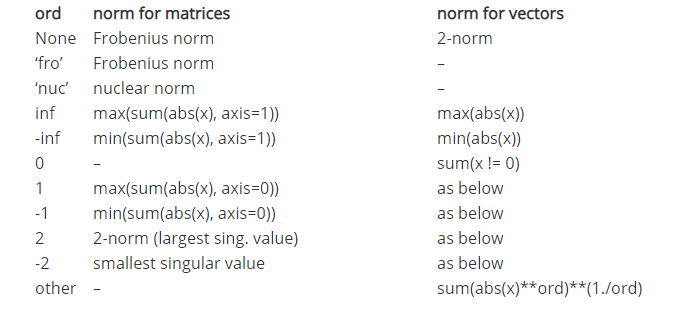




【例1】求向量的范数。
```python
import numpy as np

x = np.array([1, 2, 3, 4])

print(np.linalg.norm(x, ord=1)) 
# 10.0
print(np.sum(np.abs(x)))  
# 10

print(np.linalg.norm(x, ord=2))  
# 5.477225575051661
print(np.sum(np.abs(x) ** 2) ** 0.5)  
# 5.477225575051661

print(np.linalg.norm(x, ord=-np.inf))  
# 1.0
print(np.min(np.abs(x)))  
# 1

print(np.linalg.norm(x, ord=np.inf))  
# 4.0
print(np.max(np.abs(x)))  
# 4
```

【例2】求矩阵的范数
```python
import numpy as np

A = np.array([[1, 2, 3, 4], [2, 3, 5, 8],
              [1, 3, 5, 7], [3, 4, 7, 11]])

print(A)
# [[ 1  2  3  4]
#  [ 2  3  5  8]
#  [ 1  3  5  7]
#  [ 3  4  7 11]]

print(np.linalg.norm(A, ord=1))  # 30.0
print(np.max(np.sum(A, axis=0)))  # 30

print(np.linalg.norm(A, ord=2))  
# 20.24345358700576
print(np.max(np.linalg.svd(A, compute_uv=False)))  
# 20.24345358700576

print(np.linalg.norm(A, ord=np.inf))  # 25.0
print(np.max(np.sum(A, axis=1)))  # 25

print(np.linalg.norm(A, ord='fro'))  
# 20.273134932713294
print(np.sqrt(np.trace(np.dot(A.T, A))))  
# 20.273134932713294
```

### **方阵的行列式**

- `numpy.linalg.det(a)` 计算行列式。

【例】计算行列式。
```python
import numpy as np

x = np.array([[1, 2], [3, 4]])
print(x)
# [[1 2]
#  [3 4]]

print(np.linalg.det(x))
# -2.0000000000000004
```

### **矩阵的秩**

- `numpy.linalg.matrix_rank(M, tol=None, hermitian=False)` 返回矩阵的秩。

【例】计算矩阵的秩。
```python
import numpy as np

I = np.eye(3)  # 先创建一个单位阵
print(I)
# [[1. 0. 0.]
#  [0. 1. 0.]
#  [0. 0. 1.]]

r = np.linalg.matrix_rank(I)
print(r)  # 3

I[1, 1] = 0  # 将该元素置为0
print(I)
# [[1. 0. 0.]
#  [0. 0. 0.]
#  [0. 0. 1.]]

r = np.linalg.matrix_rank(I)  # 此时秩变成2
print(r)  # 2
```

### **矩阵的迹**

- `numpy.trace(a, offset=0, axis1=0, axis2=1, dtype=None, out=None)` 方阵的迹就是主对角元素之和。

【例】计算方阵的迹。
```python
import numpy as np

x = np.array([[1, 2, 3], [3, 4, 5], [6, 7, 8]])
print(x)
# [[1 2 3]
#  [3 4 5]
#  [6 7 8]]

y = np.array([[5, 4, 2], [1, 7, 9], [0, 4, 5]])
print(y)
# [[5 4 2]
#  [1 7 9]
#  [0 4 5]]

print(np.trace(x))  # A的迹等于A.T的迹
# 13
print(np.trace(np.transpose(x)))
# 13

print(np.trace(x + y))  # 和的迹 等于 迹的和
# 30
print(np.trace(x) + np.trace(y))
# 30
```


---
## 解方程和逆矩阵

### **逆矩阵（inverse matrix）**

设 A 是数域上的一个 n 阶矩阵，若在相同数域上存在另一个 n 阶矩阵 B，使得：`AB=BA=E`（E 为单位矩阵），则我们称 B 是 A 的逆矩阵，而 A 则被称为可逆矩阵。

- `numpy.linalg.inv(a)` 计算矩阵`a`的逆矩阵（矩阵可逆的充要条件：`det(a) != 0`，或者`a`满秩）。


【例】计算矩阵的逆矩阵。

```python
import numpy as np

A = np.array([[1, -2, 1], [0, 2, -1], [1, 1, -2]])
print(A)
# [[ 1 -2  1]
#  [ 0  2 -1]
#  [ 1  1 -2]]

# 求A的行列式，不为零则存在逆矩阵
A_det = np.linalg.det(A)  
print(A_det)
# -2.9999999999999996

A_inverse = np.linalg.inv(A)  # 求A的逆矩阵
print(A_inverse)
# [[ 1.00000000e+00  1.00000000e+00 -1.11022302e-16]
#  [ 3.33333333e-01  1.00000000e+00 -3.33333333e-01]
#  [ 6.66666667e-01  1.00000000e+00 -6.66666667e-01]]

x = np.allclose(np.dot(A, A_inverse), np.eye(3))
print(x)  # True
x = np.allclose(np.dot(A_inverse, A), np.eye(3))
print(x)  # True

A_companion = A_inverse * A_det  # 求A的伴随矩阵
print(A_companion)
# [[-3.00000000e+00 -3.00000000e+00  3.33066907e-16]
#  [-1.00000000e+00 -3.00000000e+00  1.00000000e+00]
#  [-2.00000000e+00 -3.00000000e+00  2.00000000e+00]]
```



### **求解线性方程组**

- `numpy.linalg.solve(a, b)` 求解线性方程组或矩阵方程。


【例】求解线性矩阵方程
```python
#  x + 2y +  z = 7
# 2x -  y + 3z = 7
# 3x +  y + 2z =18

import numpy as np

A = np.array([[1, 2, 1], [2, -1, 3], [3, 1, 2]])
b = np.array([7, 7, 18])
x = np.linalg.solve(A, b)
print(x)  # [ 7.  1. -2.]

x = np.linalg.inv(A).dot(b)
print(x)  # [ 7.  1. -2.]

y = np.allclose(np.dot(A, x), b)
print(y)  # True
```




---
**参考文献**
- https://www.cnblogs.com/moon1992/p/4960700.html
- https://www.cnblogs.com/moon1992/p/4948793.html





